Wytrenujmy regresor i wykorzystajmy funkcję `xgb.cv`. Wykorzystajmy wcześniejszy zestaw danych `kc_house_data.csv`.

In [1]:
import pandas as pd
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("./data/kc_house_data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [3]:
y = data.price
x = data.drop(['id', 'date', 'price', 'zipcode'], axis=1)

In [4]:
x.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
y.values

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

Podział danych na cechy oraz wyjście i złożenie ich w macierz DMatrix

In [6]:
data_dm = xgb.DMatrix(data=x.values, label=y.values)

In [7]:
params = {"objective":"reg:squarederror", "max_depth":3, "learning_rate": 0.1}

Lista parametrów learnig rate'u zawiera się w przedziale [0-1].

przykłądowy dobor listy do hiperparametrow: 

lr_vals = [0.001, 0.01, 0.1] 

#przyklad jak sie nie dobiera wartosci [0,0.1,0.2, 0.3, 0.4....] Zazwyczaj robi sie to w mniejszych obszarach.

Iterujemy po liście parametrów i wykonujemy cross walidację.

In [20]:
params["learning_rate"] = 0.8

cv_results = xgb.cv(dtrain=data_dm, params=params, nfold=3, num_boost_round=50, 
                            metrics="rmse", as_pandas=True, seed=123)
cv_results

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,260248.187069,4865.838233,266326.457953,9236.067043
1,199750.025961,3810.215863,211259.027358,14776.077637
2,179864.933612,4137.756434,195163.564522,11530.792695
3,169497.349187,2278.972862,187129.034172,11236.891862
4,163159.770149,855.269809,183509.039237,12443.985513
5,157237.986487,1108.339815,178504.588899,11283.380884
6,152708.673544,1256.702028,175038.271188,10902.483187
7,149635.135639,871.160615,173210.710418,11886.425482
8,147434.395224,1076.704166,172251.806584,11426.911264
9,144677.331914,1423.367776,170170.886878,11025.180334


Wykreślmy zależnośc błędu z dodawaniem kolejnych estymatorów.

Text(0, 0.5, 'Bład estymacji')

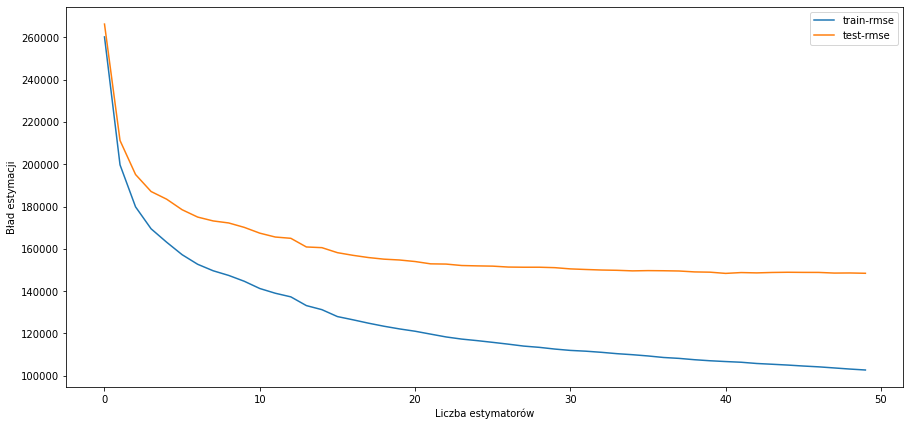

In [21]:
plt.figure(figsize=(15, 7))
plt.plot(cv_results['train-rmse-mean'])
plt.plot(cv_results['test-rmse-mean'])
plt.legend(["train-rmse", "test-rmse"])
plt.xlabel("Liczba estymatorów")
plt.ylabel("Bład estymacji")

### Zadanie 4

Korzystając z powyższego kodu stwórz wykres, na którym zostanie pokazana zależność funkcji zmiany błędu estymacji w trakcie uczenia w zależności od parametru `learning_rate`. Wykorzystaj wartości `learning_rate` z tabeli `lr_array`.

In [23]:
lr_array = [0.3, 0.1, 0.03, 0.01, 0.003, 0.001] #jedna do wyboru

In [ ]:
lr_array = [0.8, 0.5, 0.3, 0.1, 0.03, 0.01]

In [22]:
params

{'objective': 'reg:squarederror', 'max_depth': 3, 'learning_rate': 0.8}

{'objective': 'reg:squarederror', 'max_depth': 3, 'learning_rate': 0.3}
{'objective': 'reg:squarederror', 'max_depth': 3, 'learning_rate': 0.1}
{'objective': 'reg:squarederror', 'max_depth': 3, 'learning_rate': 0.03}
{'objective': 'reg:squarederror', 'max_depth': 3, 'learning_rate': 0.01}
{'objective': 'reg:squarederror', 'max_depth': 3, 'learning_rate': 0.003}
{'objective': 'reg:squarederror', 'max_depth': 3, 'learning_rate': 0.001}


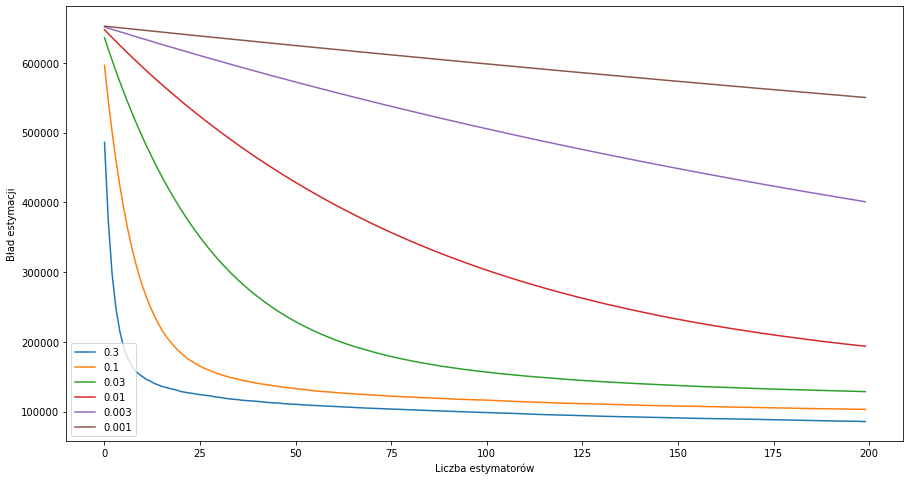

In [25]:
plt.figure(figsize=(15, 8))

for lr in lr_array:
    params["learning_rate"] = lr
    print(params)
    cv_results = xgb.cv(
        dtrain=data_dm, 
        params=params, 
        num_boost_round=200, 
        metrics="rmse", 
        as_pandas=True, 
        seed=123
    )
    plt.plot(cv_results['train-rmse-mean'])

plt.xlabel("Liczba estymatorów")
plt.ylabel("Bład estymacji")
plt.legend(lr_array)
plt.show()